In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(13)
cols = ['X', 'Y', 'Z']
idx = ['id_0', 'id_1', 'id_2', 'id_3', 'id_4']
X = np.random.random_sample((5,3))*10
df = pd.DataFrame(X, columns=cols, index=idx)
df

,X,Y,Z
id_0,7.777024,2.375412,8.242785
id_1,9.657492,9.726011,4.534492
id_2,6.090425,7.755265,6.416133
id_3,7.220182,0.350365,2.984495
id_4,0.585125,8.570609,3.728540


In [7]:
from scipy.spatial.distance import pdist,squareform

row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),columns=idx, index=idx)
row_dist

,id_0,id_1,id_2,id_3,id_4
id_0,0.000000,8.445052,5.926558,5.662200,10.511056
id_1,8.445052,0.000000,4.488695,9.810490,9.181087
id_2,5.926558,4.488695,0.000000,8.239238,6.180313
id_3,5.662200,9.810490,8.239238,0.000000,10.590090
id_4,10.511056,9.181087,6.180313,10.590090,0.000000


In [22]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [11]:
#incorrect clustering is the same, but wrong distances

from scipy.cluster.hierarchy import linkage

row_clusters = linkage(row_dist, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """


,row label 1,row label 2,distance,no. of items in clust.
cluster 1,1.0,2.0,7.623192,2.0
cluster 2,0.0,3.0,8.446311,2.0
cluster 3,4.0,5.0,13.278646,3.0
cluster 4,6.0,7.0,15.888572,5.0


In [10]:
#correct
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,1.0,2.0,4.488695,2.0
cluster 2,0.0,3.0,5.662200,2.0
cluster 3,4.0,5.0,9.181087,3.0
cluster 4,6.0,7.0,10.590090,5.0


In [12]:
row_clusters = linkage(df.values, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,1.0,2.0,4.488695,2.0
cluster 2,0.0,3.0,5.662200,2.0
cluster 3,4.0,5.0,9.181087,3.0
cluster 4,6.0,7.0,10.590090,5.0


Text(30.375, 0.5, 'Euclidean distance')

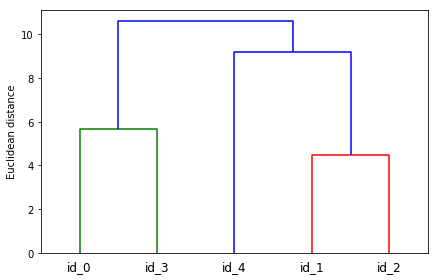

In [25]:
#set_link_color_palette(None)
row_dendr = dendrogram(row_clusters, labels=idx)
plt.tight_layout()
plt.ylabel('Euclidean distance')

Text(30.375, 0.5, 'Euclidean distance')

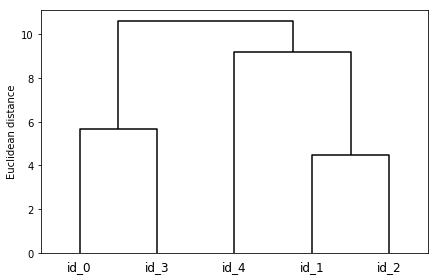

In [17]:
#from scipy.cluster.hierarchy import set_link_color_palette
#set_link_color_palette(['black'])

#row_dendr = dendrogram(row_clusters, 
                       #labels=idx,
                       #color_threshold=np.inf
                       )
#plt.tight_layout()
#plt.ylabel('Euclidean distance')

[Text(0, 0, ''),
 Text(0, 0, 'id_2'),
 Text(0, 0, 'id_1'),
 Text(0, 0, 'id_4'),
 Text(0, 0, 'id_3'),
 Text(0, 0, 'id_0')]

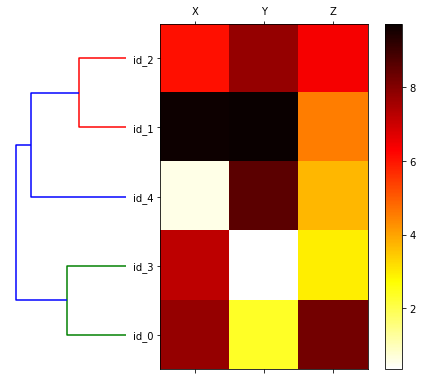

In [29]:
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])

row_dendr = dendrogram(row_clusters, orientation='left')
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

axd.set_xticks([])
axd.set_yticks([])


for i in axd.spines.values():
    i.set_visible(False)


axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])  # x-pos, y-pos, width, height
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

In [30]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3, 
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [0 1 1 0 2]


In [34]:
ac = AgglomerativeClustering(n_clusters=2, 
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [1 0 0 1 0]


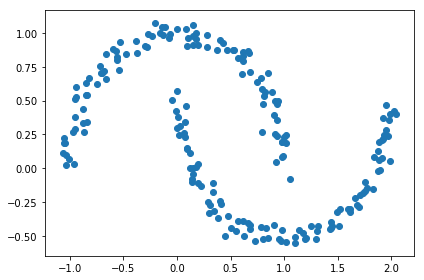

In [38]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=13)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()

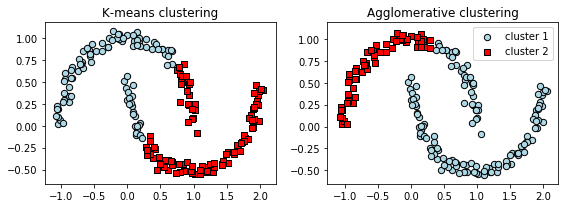

In [40]:
from sklearn.cluster import KMeans
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue',
            edgecolor='black',
            marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
            edgecolor='black',
            marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()

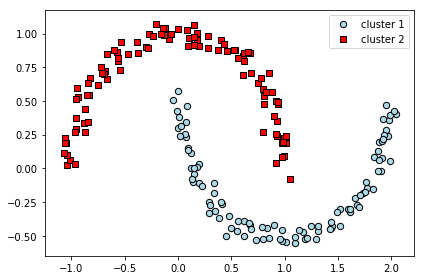

In [63]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=4, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='cluster 2')
plt.legend()
plt.tight_layout()